## Task 1: Exploratory Data Analysis (EDA) [3 marks]

### Preprocessing

We will use the raw accelerometer data within the `inertial_signals` folder. The provided script, `CombineScript.py`, organizes and sorts accelerometer data, establishing separate classes for each category and compiling participant data into these classes. The `MakeDataset.py` script is used to read through all the participant data and create a single dataset. The dataset is then split into train, test, and validation sets. We focus on the first 10 seconds of activity, translating to the initial 500 data samples due to a sampling rate of 50Hz.

#### Step-1
Place the `CombineScript.py` and `MakeDataset.py` in the same folder that contains the UCI dataset. Ensure you have moved into the folder before running the scripts. If you are running the scripts from a different folder, you will have to play around with the paths in the scripts to make it work.

#### Step-2
Run `CombineScript.py` and provide the paths to test and train folders in the UCI dataset. This will create a folder called `Combined` which will contain all the data from all the participants. This is how most of the datasets are organized. You may encounter similar dataset structures in the future.

#### Step-3
Run `MakeDataset.py` and provide the path to the `Combined` folder. This will create a `Dataset` which will contain the train, test, and validation sets. You can use this dataset to train your models.


## Questions

1. **Plot the waveform for one sample data from each activity class.** Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

2. **Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities (walking, walking_downstairs, walking_upstairs)?** Look at the linear acceleration (acc(x)^2 + acc(y)^2 + acc(z)^2) for each activity and justify your answer. [0.5 marks]

3. **Visualize the data using PCA.** [1 mark]

   - Use PCA (Principal Component Analysis) on Total Acceleration (acc(x)^2 + acc(y)^2 + acc(z)^2) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different classes of activities.
   - Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different classes of activities.
   - Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different classes of activities.
   - Compare the results of PCA on Total Acceleration, TSFEL, and the dataset features. Which method do you think is better for visualizing the data?

4. **Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset.** Identify the features that are highly correlated with each other. Are there any redundant features? [1 mark]

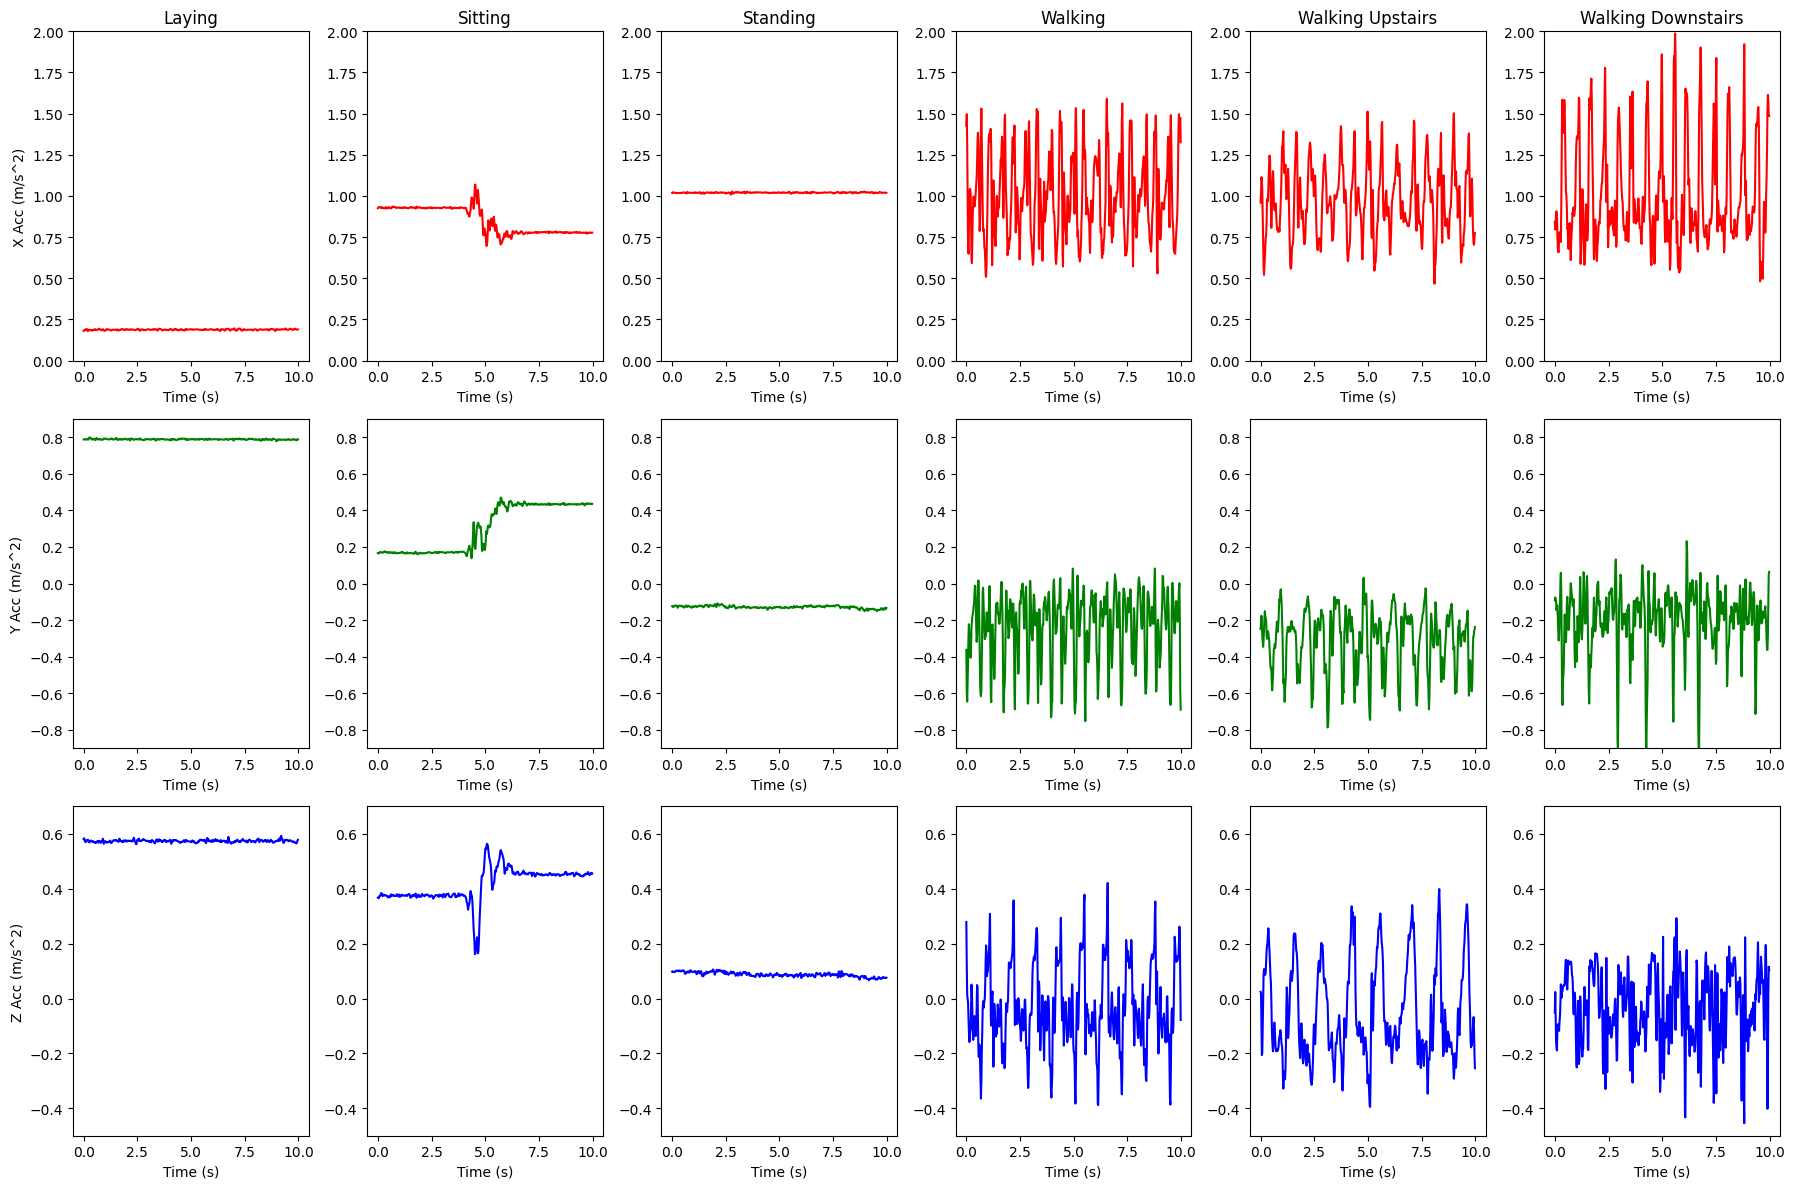

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 12))

# Subplots for each activity as column
for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)
    
    x_acc = data['accx'][:500]
    y_acc = data['accy'][:500]
    z_acc = data['accz'][:500]
    
    time = [i/50 for i in range(500)]
    
    # First Row - X component of acceleration
    plt.subplot(3, 6, i + 1)
    plt.plot(time, x_acc, color='r')
    plt.ylim(0,2)
    plt.title(activities[i])
    if i == 0:
        plt.ylabel('X Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    # Second Row - Y component of acceleration
    plt.subplot(3, 6, i + 7)
    plt.plot(time, y_acc, color='g')
    plt.ylim(-0.9,0.9)
    if i == 0:
        plt.ylabel('Y Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    # Third Row - Z component of acceleration
    plt.subplot(3, 6, i + 13)
    plt.plot(time, z_acc, color='b')
    plt.ylim(-0.5,0.7)
    if i == 0:
        plt.ylabel('Z Acc (m/s^2)')
    plt.xlabel('Time (s)')

plt.tight_layout()

plt.show()


activities like walking, walking upstairs and downstairs, show high variability in the value of acceleration across all 3 axes, while activities like laying, sitting, standing exhibit relatively low variability in acceleration values across all three axes.


talking about similarities-
There is similarity in waveform shapes for activities, like walking and standing.


Yes, the model should be able to classify the activities based on the data. The waveforms for different activities show distinct patterns, which a machine learning model can learn to recognize.This is supported by the observation that acceleration values for each activity are centered around specific ranges, which indicates the purpose.


2. **Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities (walking, walking_downstairs, walking_upstairs)?** Look at the linear acceleration (acc(x)^2 + acc(y)^2 + acc(z)^2) for each activity and justify your answer. [0.5 marks]

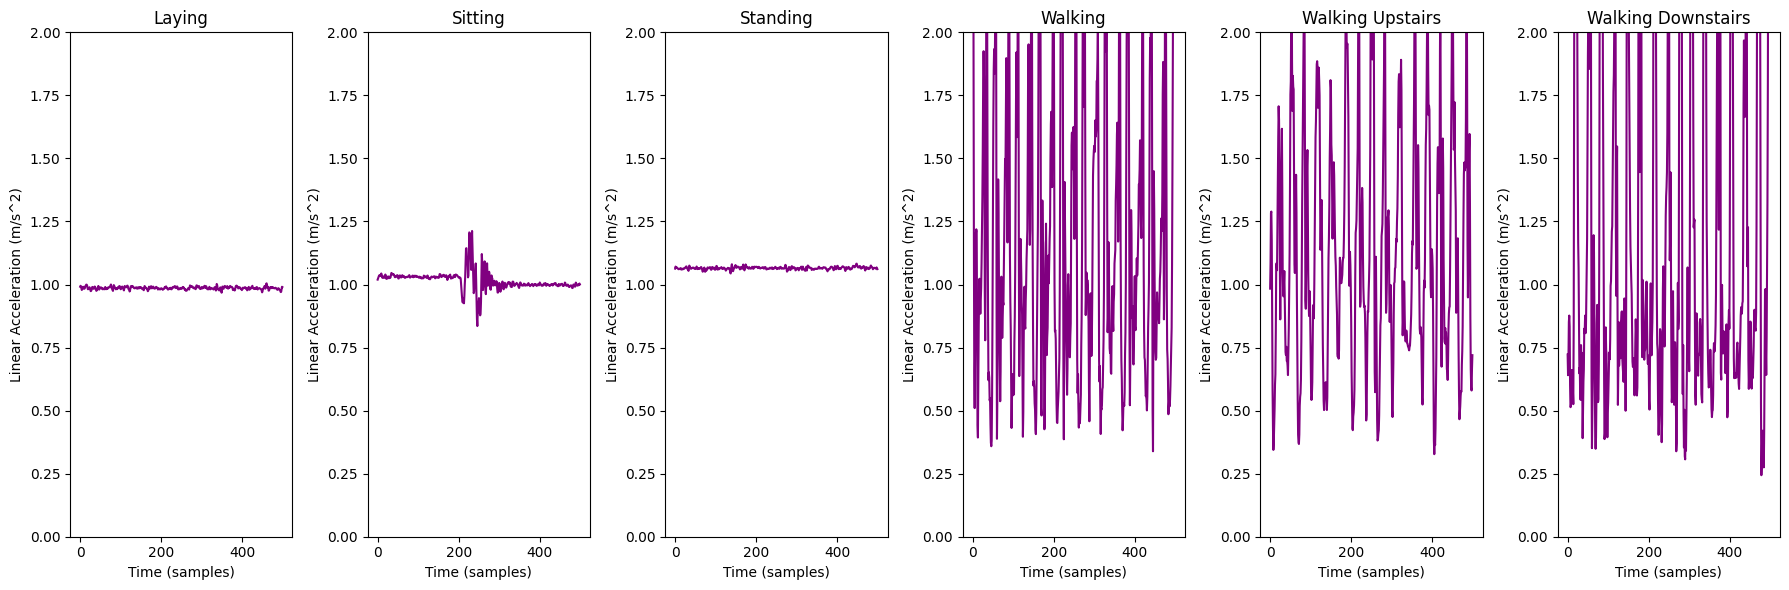

In [2]:
import numpy as np

# File paths
files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 6))

# Subplots for each activity
for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)

    linear_acc = data['accx']**2 + data['accy']**2 + data['accz']**2

    plt.subplot(1, 6, i + 1)
    plt.plot(linear_acc[:500], color='purple')
    plt.title(activities[i])
    plt.ylim(0, 2)
    plt.xlabel('Time (samples)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    
plt.tight_layout()
plt.show()


Yes, A machine learning model will be easily able to differentiate between static and dynamic activities. we can also see this from the above plotted waveforms, that the acceleration values are highly varying in dynamic activities like walking, upstairs and downstairs and the acceleration values rae almost constant in static avtivities like laying, sitting, standing. From this observation we can say that the value of  (acc^2x+acc^2y+acc^2z) values would be higher for dynamic activities than static activities .


3. **Visualize the data using PCA.** [1 mark]

   - Use PCA (Principal Component Analysis) on Total Acceleration (acc(x)^2 + acc(y)^2 + acc(z)^2) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different classes of activities.

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


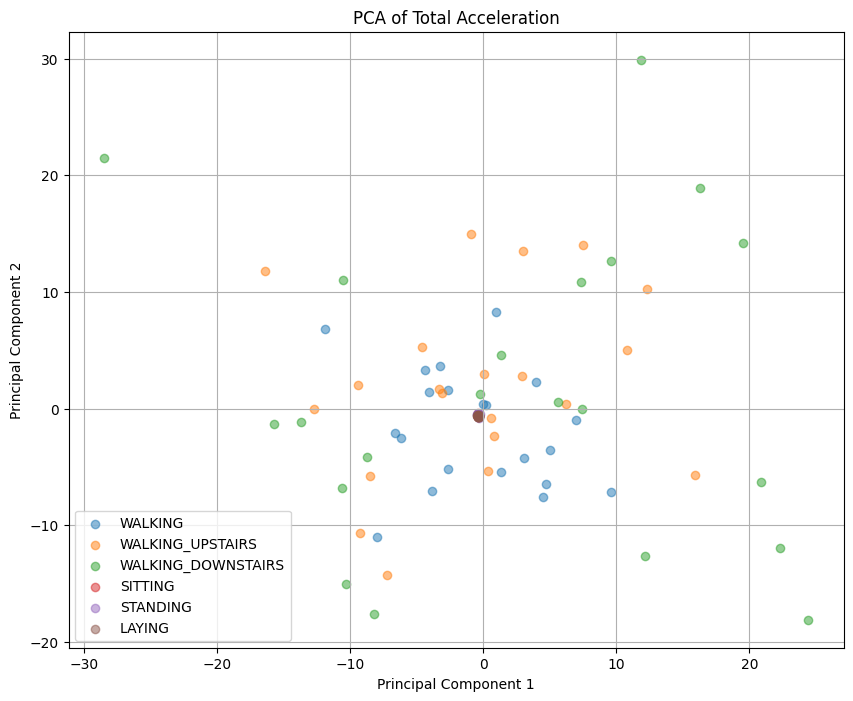

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train, y_train, classes

# Calculate total acceleration from dataset
total_acceleration = np.sum(X_train**2, axis=2)
X_train_2D = total_acceleration.reshape(total_acceleration.shape[0], -1)

# Standardize the feature data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_2D)

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scale)

labels = {v: k for k, v in classes.items()}

# Plot the scatter plot
plt.figure(figsize=(10, 8))
activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Total Acceleration')
plt.legend()
plt.grid(True)
plt.show()

- Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different classes of activities.

Original X_train shape: (126, 500, 3)


C:\Users\darpa\AppData\Local\Temp\ipykernel_18144\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\darpa\AppData\Local\Temp\ipykernel_18144\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\darpa\AppData\Local\Temp\ipykernel_18144\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\darpa\AppData\Local\Temp\ipykernel_18144\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\darpa\AppData\Local\Temp\ipykernel_18144\2332216862.py:20: UserWarn

X_train after TSFEL feature extraction: (126, 42)
X_train after scaling: (126, 42)
X_train after PCA: (126, 2)


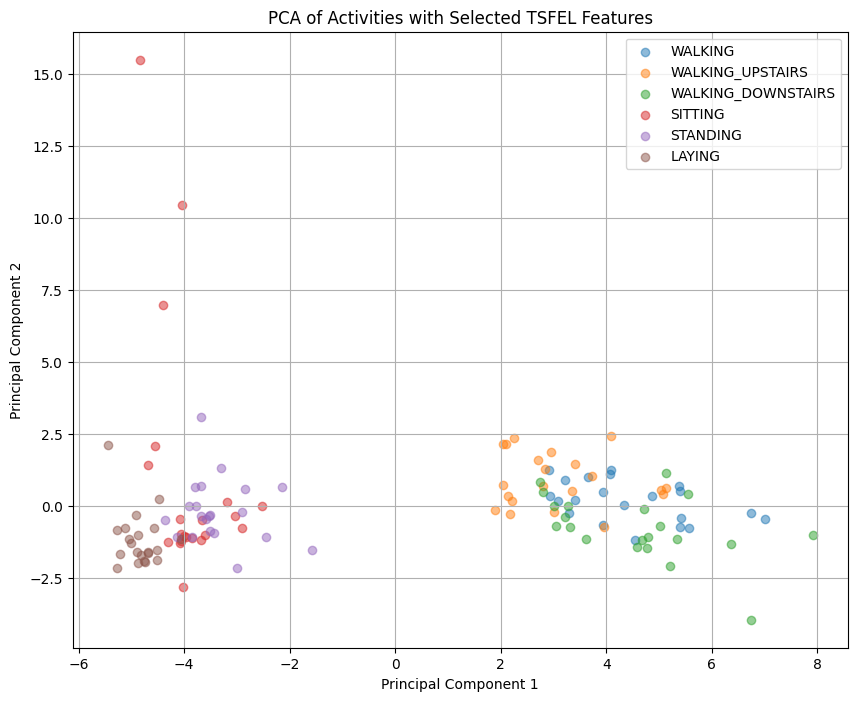

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from MakeDataset import X_train, y_train, classes

# Reshape the data into the shape required by TSFEL (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape
print(f"Original X_train shape: {X_train.shape}")

# Create a custom feature configuration to select only temporal features
cfg = tsfel.get_features_by_domain("temporal")

# Extract the selected features using TSFEL
X_train_tsfel = pd.DataFrame()

for i in range(n_samples):
    tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
    X_train_tsfel = pd.concat([X_train_tsfel, tsfel_features], axis=0, ignore_index=True)

print(f"X_train after TSFEL feature extraction: {X_train_tsfel.shape}") 

# Standardize the feature data
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)
print(f"X_train after scaling: {X_train_tsfel_scaled.shape}")

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tsfel_scaled)
print(f"X_train after PCA: {X_train_pca.shape}") 

# Plot the scatter plot
labels = {v: k for k, v in classes.items()}
activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

plt.figure(figsize=(10, 8))

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities with Selected TSFEL Features')
plt.legend()
plt.grid(True)
plt.show()

- Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different classes of activities.

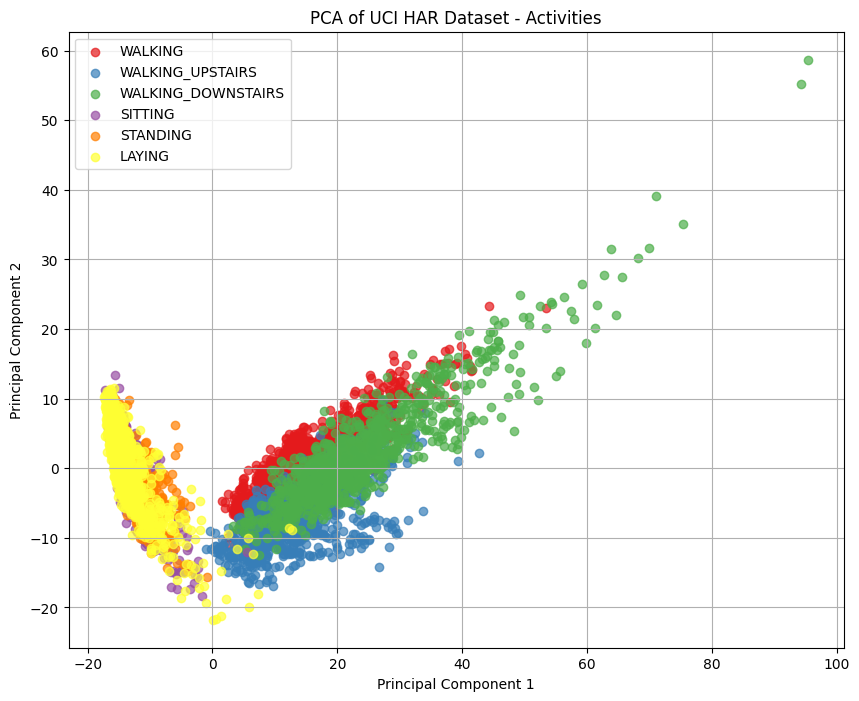

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# File paths
xtrain_path = r'UCI HAR Dataset/train/X_train.txt'
ytrain_path = r'UCI HAR Dataset/train/y_train.txt'

# Load the features and labels
xtrain = np.loadtxt(xtrain_path)
ytrain = np.loadtxt(ytrain_path, dtype=int)

# Preprocessing: Standardize the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# Apply PCA to reduce from 561 features to 2D
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
activities = np.unique(ytrain)
colormap = plt.colormaps.get_cmap('Set1') 
colors = [colormap(i) for i in range(len(activities))]

for i, activity in enumerate(activities):
    plt.scatter(xtrain_pca[ytrain == activity, 0], xtrain_pca[ytrain == activity, 1],
                    color=colors[i], label=labels[activity], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of UCI HAR Dataset - Activities')
plt.legend()
plt.grid(True)
plt.show()

 - Compare the results of PCA on Total Acceleration, TSFEL, and the dataset features. Which method do you think is better for visualizing the data?

Using a feature extraction library like TSFEL allows for the creation of more complex and task-specific features. These features provide a richer representation of the data compared to the raw total acceleration.


The PCA plots for total acceleration and TSFEL features show different patterns. While PCA on total acceleration captures general variations, PCA on TSFEL features emphasize more task-specific characteristics.


The activities that we have (i.e. walking, walking upstairs, walking downstairs, sitting, laying, standing), have some unique patterns that are no well-captured by the total acceleration. The PCA on TSFEL features provides a more clearer separation between different classes as compared to that from PCA on Total Acceleration.



4. **Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset.** Identify the features that are highly correlated with each other. Are there any redundant features? [1 mark]

In [6]:
import pandas as pd

# Standardize the TSFEL features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)

# Calculate the correlation matrix for TSFEL features
X_train_tsfel_df = pd.DataFrame(X_train_tsfel_scaled)
correlation_matrix_tsfel = X_train_tsfel_df.corr()

# Display the correlation matrix
print("Correlation Matrix of TSFEL Features:")
print(correlation_matrix_tsfel)


Correlation Matrix of TSFEL Features:
          0         1         2         3         4         5         6   \
0   1.000000 -0.209707  0.188140  0.448883  0.009752  0.443816  0.197790   
1  -0.209707  1.000000 -0.250115 -0.289225 -0.065848 -0.290407 -0.142194   
2   0.188140 -0.250115  1.000000  0.069575  0.060328  0.070869  0.056008   
3   0.448883 -0.289225  0.069575  1.000000  0.047129  0.993984  0.319136   
4   0.009752 -0.065848  0.060328  0.047129  1.000000  0.046619  0.011578   
5   0.443816 -0.290407  0.070869  0.993984  0.046619  1.000000  0.343646   
6   0.197790 -0.142194  0.056008  0.319136  0.011578  0.343646  1.000000   
7  -0.411594  0.278038 -0.012271 -0.796524 -0.054400 -0.815222 -0.400302   
8  -0.429732  0.088364 -0.126502 -0.658268 -0.010387 -0.648922 -0.375982   
9  -0.403949  0.270418 -0.011753 -0.797142 -0.055425 -0.815787 -0.397852   
10  0.391804 -0.256915  0.053122  0.961618  0.056171  0.946974  0.165882   
11 -0.023140 -0.482995  0.327382 -0.022591  0.1643

In [7]:
def find_redundant_features(correlation_matrix, threshold=0.95):
    redundant_features = []
    # Iterate through each pair of features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                redundant_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
    return redundant_features

# Identify redundant features in TSFEL with a threshold of 0.95
redundant_features_tsfel = find_redundant_features(correlation_matrix_tsfel, threshold=0.95)

print("Redundant Features in TSFEL Features (Threshold > 0.95):")
for feature_pair in redundant_features_tsfel:
    print(feature_pair)

Redundant Features in TSFEL Features (Threshold > 0.95):
(5, 3)
(9, 7)
(10, 3)
(12, 3)
(12, 5)
(12, 10)
(17, 3)
(17, 5)
(17, 12)
(19, 5)
(19, 17)
(23, 21)
(24, 17)
(26, 3)
(26, 5)
(26, 12)
(26, 17)
(26, 19)
(26, 24)
(33, 31)
(37, 35)
(40, 31)
(40, 33)


In [8]:
import numpy as np
import pandas as pd

xtrain_path = r'UCI HAR Dataset/train/X_train.txt'
xtrain = np.loadtxt(xtrain_path)
xtrain_df = pd.DataFrame(xtrain)

# Calculate the correlation matrix for the original features
correlation_matrix_original = xtrain_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Original Features:")
print(correlation_matrix_original)

Correlation Matrix of Original Features:
          0         1         2         3         4         5         6    \
0    1.000000  0.148061 -0.256952  0.000619 -0.021903 -0.044617  0.006290   
1    0.148061  1.000000 -0.078769 -0.045160 -0.044920 -0.049746 -0.044180   
2   -0.256952 -0.078769  1.000000 -0.020217 -0.016641 -0.008410 -0.018747   
3    0.000619 -0.045160 -0.020217  1.000000  0.927461  0.851668  0.998632   
4   -0.021903 -0.044920 -0.016641  0.927461  1.000000  0.895510  0.922803   
..        ...       ...       ...       ...       ...       ...       ...   
556  0.037444  0.017967 -0.063609  0.018985 -0.008507 -0.018429  0.019389   
557  0.028844  0.075679 -0.034037 -0.024810 -0.014592 -0.006471 -0.024951   
558 -0.035257 -0.005309  0.008587 -0.371653 -0.380531 -0.345011 -0.368191   
559  0.034371  0.001053 -0.015288  0.471065  0.523600  0.476006  0.466424   
560  0.028242 -0.013903 -0.022643  0.394825  0.433169  0.482828  0.390922   

          7         8         9   

In [9]:
# Identify redundant features in original dataset with a threshold of 0.95
redundant_features_xtrain = find_redundant_features(correlation_matrix_original, threshold=0.95)

print("Redundant Features in Original Dataset Features (Threshold > 0.95):")
for feature_pair in redundant_features_xtrain:
    print(feature_pair)

Redundant Features in Original Dataset Features (Threshold > 0.95):
(6, 3)
(7, 4)
(8, 5)
(9, 3)
(9, 6)
(10, 4)
(12, 3)
(12, 6)
(13, 4)
(15, 3)
(15, 4)
(15, 6)
(15, 7)
(15, 9)
(15, 12)
(16, 6)
(19, 3)
(19, 6)
(19, 15)
(20, 4)
(20, 7)
(21, 5)
(21, 8)
(46, 43)
(47, 44)
(48, 45)
(49, 40)
(50, 41)
(51, 42)
(52, 40)
(52, 49)
(53, 41)
(53, 50)
(54, 42)
(54, 51)
(56, 40)
(56, 49)
(56, 52)
(59, 43)
(59, 46)
(60, 44)
(60, 47)
(61, 45)
(61, 48)
(66, 65)
(67, 65)
(67, 66)
(68, 66)
(68, 67)
(70, 69)
(71, 69)
(71, 70)
(72, 70)
(72, 71)
(74, 73)
(75, 73)
(75, 74)
(76, 73)
(76, 74)
(76, 75)
(83, 3)
(83, 6)
(83, 9)
(83, 12)
(83, 15)
(83, 19)
(84, 4)
(84, 13)
(84, 83)
(86, 3)
(86, 6)
(86, 9)
(86, 12)
(86, 15)
(86, 19)
(86, 83)
(86, 84)
(87, 4)
(87, 7)
(87, 83)
(87, 84)
(87, 86)
(88, 85)
(89, 83)
(89, 86)
(90, 84)
(90, 87)
(91, 85)
(92, 83)
(92, 86)
(93, 84)
(93, 87)
(94, 85)
(94, 88)
(95, 3)
(95, 6)
(95, 12)
(95, 15)
(95, 83)
(95, 84)
(95, 85)
(95, 86)
(95, 87)
(95, 88)
(97, 84)
(97, 87)
(99, 3)
(99, 6)